<h1 align='center'> Claim Management System </h1>
<h3 align='center'> Data Preprocessing & Model Creation </h3>

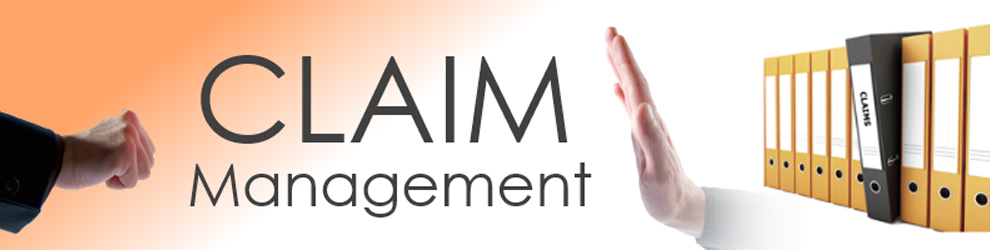

#### If this helped in your learning, then please UPVOTE – as they are the source of motivation!**

#### Happy Learning**

1. [Introduction](#1) <a id=18></a>
2. [Preparation](#2)
    - 2.1 [Packages](#3)
    - 2.2 [Initial Setup](#4)
3. [Background](#5)
4. [Conclusions from EDA](#6)
5. [Data Preprocessing](#7)
    - 5.1 [Numerical feature selection based on correlation](#8)
    - 5.2 [Target encoding categorical variables](#9)
    - 5.3 [Rounding numerical feature values to 2 decimal places](#10)
    - 5.4 [Handling missing values](#11)
    - 5.5 [Categorical feature importance (based on chi2 statistics)](#12)
    - 5.6 [Numerical feature importance (based on Anova test)](#13)
    - 5.7 [Creating polynomial features](#14)
    - 5.8 [Polynomial feature selection (using chi2 and anova statistics)](#15)
6. [Model Training & Hyperparameter Tuning](#16)
    - 6.1 [XGBoost model with HyperOpt](#17)

## 1. Introduction <a id=1></a>
[Table of Contents](#18)

In a world shaped by the emergence of new uses and lifestyles, everything is going faster and faster. When facing unexpected events, customers expect their insurer to support them as soon as possible. However, claims management may require different levels of check before a claim can be approved and a payment can be made. With the new practices and behaviors generated by the digital economy, this process needs adaptation thanks to data science to meet the new needs and expectations of customers.

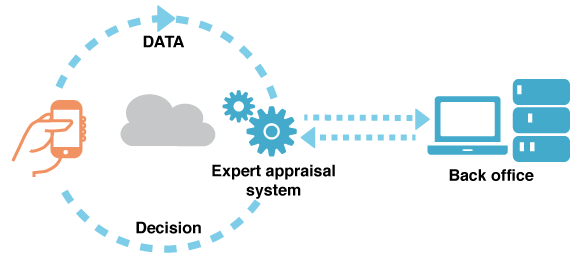

In this challenge, BNP Paribas Cardif is providing an anonymized database with two categories of claims:
1. Suitable for approval.
2. Not suitable for approval.

We need to predict the category of a claim based on features available early in the process, helping BNP Paribas Cardif accelerate its claims process and therefore provide a better service to its customers.

## 2 Preparation <a id=2></a>
[Table of Contents](#18)

### 2.1 Packages <a id=3></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import gc

import warnings
warnings.filterwarnings("ignore")

# Train test split 
from sklearn.model_selection import train_test_split

# Data Cleaning
from sklearn.feature_selection import VarianceThreshold
## outlier removal
from sklearn.neighbors import LocalOutlierFactor
## Imputer
from sklearn.impute import SimpleImputer
from sklearn.impute import KNNImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

# Feature Selection
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_classif
from sklearn.feature_selection import chi2
from sklearn.feature_selection import f_classif
from sklearn.feature_selection import RFE
from sklearn.feature_selection import SelectFromModel

# Data Transformation
## Feature scaling
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
## Encoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from category_encoders import TargetEncoder
## Distribution transformer
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import QuantileTransformer
## Numerical to Categorical data transformation
from sklearn.preprocessing import KBinsDiscretizer
## Polynomial features
from sklearn.preprocessing import PolynomialFeatures

# Pipeline
from sklearn.pipeline import Pipeline

# Model
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.compose import ColumnTransformer
from sklearn.compose import TransformedTargetRegressor

# Model evaluation
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold

# Hyperparameter tuning
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.model_selection import StratifiedKFold

# Metrics
from sklearn.metrics import log_loss
from sklearn.metrics import accuracy_score

### 2.2 Initial Setup <a id=4></a>

In [2]:
df = pd.read_csv('../input/bnp-paribas-cardif-claims-management/train.csv.zip')

# Dropping ID column, it is an index values.
df.drop('ID', axis=1, inplace=True)
target_col = ['target']
cat_cols = ['v3', 'v22', 'v24', 'v30', 'v31', 'v38', 'v47', 'v52', 'v56', 'v62', 'v66', 'v71', 'v72', 'v74', 'v75', 'v79', 'v91', 'v107', 'v110', 'v112', 'v113', 'v125', 'v129'] 
con_cols = list(df.columns.drop(target_col + cat_cols))

print("There are {} Categorical cols : {}".format(len(cat_cols), cat_cols))
print("There are {} Continuous cols : {}".format(len(con_cols), con_cols))
print("There are {} Target cols : {}".format(len(target_col), target_col))

There are 23 Categorical cols : ['v3', 'v22', 'v24', 'v30', 'v31', 'v38', 'v47', 'v52', 'v56', 'v62', 'v66', 'v71', 'v72', 'v74', 'v75', 'v79', 'v91', 'v107', 'v110', 'v112', 'v113', 'v125', 'v129']
There are 108 Continuous cols : ['v1', 'v2', 'v4', 'v5', 'v6', 'v7', 'v8', 'v9', 'v10', 'v11', 'v12', 'v13', 'v14', 'v15', 'v16', 'v17', 'v18', 'v19', 'v20', 'v21', 'v23', 'v25', 'v26', 'v27', 'v28', 'v29', 'v32', 'v33', 'v34', 'v35', 'v36', 'v37', 'v39', 'v40', 'v41', 'v42', 'v43', 'v44', 'v45', 'v46', 'v48', 'v49', 'v50', 'v51', 'v53', 'v54', 'v55', 'v57', 'v58', 'v59', 'v60', 'v61', 'v63', 'v64', 'v65', 'v67', 'v68', 'v69', 'v70', 'v73', 'v76', 'v77', 'v78', 'v80', 'v81', 'v82', 'v83', 'v84', 'v85', 'v86', 'v87', 'v88', 'v89', 'v90', 'v92', 'v93', 'v94', 'v95', 'v96', 'v97', 'v98', 'v99', 'v100', 'v101', 'v102', 'v103', 'v104', 'v105', 'v106', 'v108', 'v109', 'v111', 'v114', 'v115', 'v116', 'v117', 'v118', 'v119', 'v120', 'v121', 'v122', 'v123', 'v124', 'v126', 'v127', 'v128', 'v130', 'v

## 3. Background <a id=5></a>
[Table of Contents](#18)

In this notebook we'll be covering data preprocessing and hyperparameter tuning for model. 

**To understand EDA of this project please refer this [CMS EDA notebook](https://www.kaggle.com/code/crashoverdrive/cms-complete-eda-guide).**

## 4. Conclusions from EDA <a id=6></a>
[Table of Contents](#18)
1. There are both categorical and continuous features present in data and target feature has binary value.
2. Feature values are mixed of int, float64 & object data types.
3. There are multiple columns with a high degree of missing values.
4. There is a class imbalance in target variable ('label 0':23.1%, 'label 1':76.9%).
5. Based on univariate count plots of categorical variables, features <b> v3, v30, v31, v38, v62, v74 & v129 </b> seemed single valued feature i.e. zero-vector predictor. These columns have same value in more than <b>95%</b> of the samples and not adding useful information for model building.
6. <b>Outliers</b> are present in a `majority of continuous feature variables` that we need to address during data pre-processing.
7. There are continuous variables with skewed distributions.
8. PCA shows that we can keep <b>99% data variance</b> with 5 columns only. Hence, there are dependent variables in data.
9. There are highly correlated dependent features to other dependent features based on the heatmap and scatter plot heatmap shown in EDA notebook.

## 5. Data Preprocessing <a id=7></a>
[Table of Contents](#18)

### 5.1 Numerical feature selection based on correlation <a id=8></a>
[Table of Contents](#18)

In [3]:
corr_matrix = df[con_cols].corr()

dropped_cols = []
corr_cols = corr_matrix.columns

for i in range(len(corr_cols)-1):
    if corr_cols[i] in dropped_cols:
#         print("disjoint col={} for {}, ".format(corr_cols[i], i))
        continue

    for j in range(i+1, len(corr_cols)):
        if abs(corr_matrix.iloc[i,j]) > 0.8 and corr_cols[j] not in dropped_cols:
#             print("removing col:{} for [i,j]=[{},{}]".format(corr_cols[j], i, j))
            dropped_cols.append(corr_cols[j])
            
print("Number of numerical feature columns dropped:{}".format(len(dropped_cols)))

# Updating con_cols & dataset based on correlation 
[con_cols.remove(x) for x in dropped_cols]
df.drop(dropped_cols, axis=1, inplace=True)

del corr_matrix, corr_cols, dropped_cols
gc.collect()

Number of numerical feature columns dropped:52


0

- 
#### Train test split of training data

In [4]:
X = df[cat_cols + con_cols]
y = df[target_col]

X_train, X_test, y_train, y_test = train_test_split(X[cat_cols + con_cols], y, test_size=0.25, random_state=1)

print("Shape of X={}\ny={}\nX_train={}\nX_test={}\ny_train={}\ny_test={}".format(X.shape, y.shape, X_train.shape, 
                                                                                 X_test.shape,y_train.shape, y_test.shape))
# Reseting indexes as index got shuffled after train-test split
X_train.reset_index(inplace=True, drop=True)
y_train.reset_index(inplace=True, drop=True)
X_test.reset_index(inplace=True, drop=True)
y_test.reset_index(inplace=True, drop=True)

Shape of X=(114321, 79)
y=(114321, 1)
X_train=(85740, 79)
X_test=(28581, 79)
y_train=(85740, 1)
y_test=(28581, 1)


### 5.2 Target encoding categorical variables <a id=9></a>
[Table of Contents](#18)

In [5]:
# Target encoding categorical variable
target_encoder = TargetEncoder(verbose=1, cols=cat_cols, handle_missing='return_nan',
                              handle_unknown='return_nan')
X_train = target_encoder.fit_transform(X_train, y_train)
X_test = target_encoder.transform(X_test)

### 5.3 Rounding numerical feature values to 2 decimal places <a id=10></a>
[Table of Contents](#18)

Interestingly, it improves the model performance effectively by 0.3 value in terms of log_loss.

In [6]:
# Rounding numerical values to 2nd decimal
X_train = X_train.round(decimals=2)
X_test = X_test.round(decimals=2)

### 5.4 Handling missing values <a id=11></a>
[Table of Contents](#18)

We are using constant value (0 for category columns and -1 for numerical columns) to impute missing values.

In [7]:
imputer_strategies = ['mean', 'median', 'most_frequent', 'constant']
transformer = [('cat', SimpleImputer(strategy=imputer_strategies[3], fill_value=0), cat_cols), 
     ('num', SimpleImputer(strategy=imputer_strategies[3], fill_value=-1), con_cols)]
imp_transformer = ColumnTransformer(transformers=transformer, remainder='passthrough', verbose_feature_names_out=False)

X_train = pd.DataFrame(imp_transformer.fit_transform(X_train), columns=cat_cols + con_cols)
X_test = pd.DataFrame(imp_transformer.transform(X_test), columns=cat_cols + con_cols)

### 5.5 Categorical feature importance (based on chi2 statistics) <a id=12></a>
[Table of Contents](#18)

Text(0.5, 1.0, 'Chi2 relation: Cat_cols vs target')

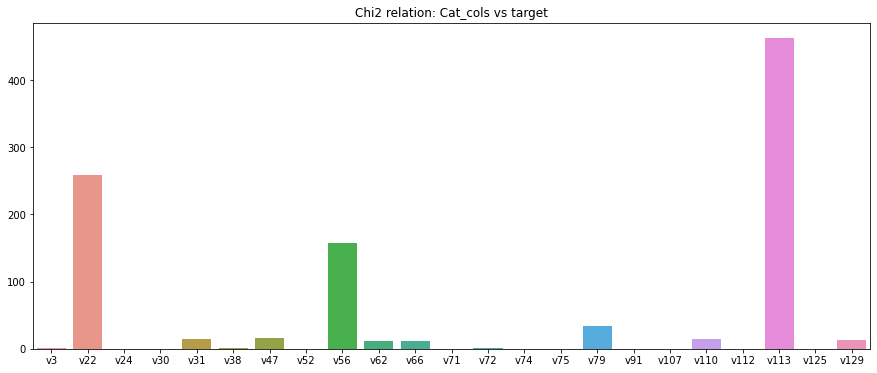

In [8]:
# categorical_input-categorical_output scoring function
score_func = [chi2, mutual_info_classif]
fs = SelectKBest(score_func=score_func[0], k='all')

fs.fit(X_train[cat_cols], y_train)
up_cat_cols = list(fs.get_feature_names_out())

fig = plt.figure(figsize=(15,6))
grid = sns.barplot(y=fs.scores_, x=fs.get_feature_names_out())
grid.axes.set_title("Chi2 relation: Cat_cols vs target")

### 5.6 Numerical feature importance (based on Anova test) <a id=13></a>
[Table of Contents](#18)

<AxesSubplot:>

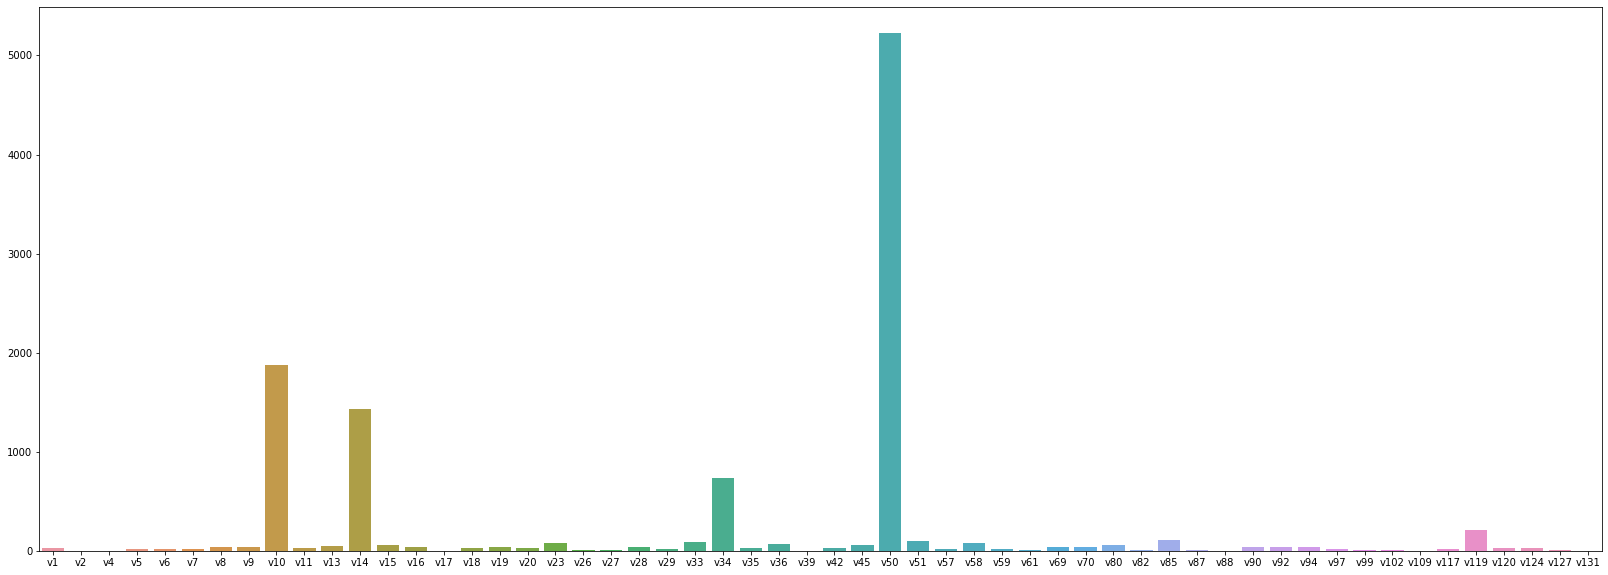

In [9]:
# numerical_input-categorical_output scoring function
score_func = [chi2, mutual_info_classif, f_classif]
fs = SelectKBest(score_func=score_func[2], k='all')

fs.fit(X_train[con_cols], y_train)
up_con_cols = list(fs.get_feature_names_out())
fig = plt.figure(figsize=(28,10))
sns.barplot(x=fs.get_feature_names_out(), y=fs.scores_)

### 5.7 Creating polynomial features <a id=14></a>
[Table of Contents](#18)

#### 5.7.1 Polynomial features using categorical features

In [10]:
# # Create the polynomial object with specified degree

poly_transformer_cat = ColumnTransformer([('poly_trans', PolynomialFeatures(degree = 2), up_cat_cols)], 
                                      remainder='drop', verbose_feature_names_out=False)
# # Train the polynomial features
# # Transform the features
poly_features_cat = pd.DataFrame(poly_transformer_cat.fit_transform(X_train[up_cat_cols]), 
                             columns=poly_transformer_cat.get_feature_names_out())
poly_features_cat_test = pd.DataFrame(poly_transformer_cat.transform(X_test[up_cat_cols]),
                                  columns=poly_transformer_cat.get_feature_names_out())

print('Polynomial Features shape: ', poly_features_cat.shape)
print("Polynomial Categorical features:{}".format(poly_transformer_cat.get_feature_names_out()))

Polynomial Features shape:  (85740, 300)
Polynomial Categorical features:['1' 'v3' 'v22' 'v24' 'v30' 'v31' 'v38' 'v47' 'v52' 'v56' 'v62' 'v66'
 'v71' 'v72' 'v74' 'v75' 'v79' 'v91' 'v107' 'v110' 'v112' 'v113' 'v125'
 'v129' 'v3^2' 'v3 v22' 'v3 v24' 'v3 v30' 'v3 v31' 'v3 v38' 'v3 v47'
 'v3 v52' 'v3 v56' 'v3 v62' 'v3 v66' 'v3 v71' 'v3 v72' 'v3 v74' 'v3 v75'
 'v3 v79' 'v3 v91' 'v3 v107' 'v3 v110' 'v3 v112' 'v3 v113' 'v3 v125'
 'v3 v129' 'v22^2' 'v22 v24' 'v22 v30' 'v22 v31' 'v22 v38' 'v22 v47'
 'v22 v52' 'v22 v56' 'v22 v62' 'v22 v66' 'v22 v71' 'v22 v72' 'v22 v74'
 'v22 v75' 'v22 v79' 'v22 v91' 'v22 v107' 'v22 v110' 'v22 v112' 'v22 v113'
 'v22 v125' 'v22 v129' 'v24^2' 'v24 v30' 'v24 v31' 'v24 v38' 'v24 v47'
 'v24 v52' 'v24 v56' 'v24 v62' 'v24 v66' 'v24 v71' 'v24 v72' 'v24 v74'
 'v24 v75' 'v24 v79' 'v24 v91' 'v24 v107' 'v24 v110' 'v24 v112' 'v24 v113'
 'v24 v125' 'v24 v129' 'v30^2' 'v30 v31' 'v30 v38' 'v30 v47' 'v30 v52'
 'v30 v56' 'v30 v62' 'v30 v66' 'v30 v71' 'v30 v72' 'v30 v74' 'v30 v75'


#### 5.7.2 Polynomial features using numerical features

In [11]:
# # Create the polynomial object with specified degree

poly_transformer_con = ColumnTransformer([('poly_trans', PolynomialFeatures(degree = 2), up_con_cols)], 
                                      remainder='drop', verbose_feature_names_out=False)
# # Train the polynomial features

# # Transform the features
poly_features_con = pd.DataFrame(poly_transformer_con.fit_transform(X_train[up_con_cols]), 
                             columns=poly_transformer_con.get_feature_names_out())
poly_features_con_test = pd.DataFrame(poly_transformer_con.transform(X_test[up_con_cols]),
                                  columns=poly_transformer_con.get_feature_names_out())

print('Polynomial Features shape: ', poly_features_con.shape)
print("Polynomial Continuous features:{}".format(poly_transformer_con.get_feature_names_out()))

Polynomial Features shape:  (85740, 1653)
Polynomial Continuous features:['1' 'v1' 'v2' ... 'v127^2' 'v127 v131' 'v131^2']


### 5.8 Polynomial feature selection (using chi2 and anova statistics) <a id=15></a>
[Table of Contents](#18)

We are plotting **barplot** for each polynomial feature representing its importance to predict target variable. Based on barplot we can pick k best features among all features.

**Note:** *Importance of features are computed using ch2 for categorical features and Anova test for numerical features.*

#### 5.8.1 Select K best categorical features

K best categorical features:
 ['v113', 'v3 v113', 'v22^2', 'v22 v56', 'v22 v79', 'v24 v113']


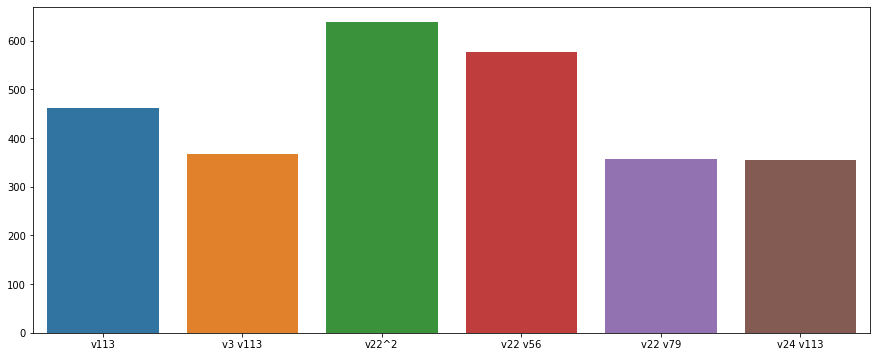

In [12]:
# categorical_input-categorical_output scoring function
score_func = [chi2, mutual_info_classif]
# using small value of k=6 for sake of this demonstration
fs = SelectKBest(score_func=score_func[0], k=6)

fs.fit(poly_features_cat, y_train)
up_cat_cols_2 = list(fs.get_feature_names_out())

fig = plt.figure(figsize=(15,6))
sns.barplot(x=fs.get_feature_names_out(), y=fs.scores_[fs.get_support()])

print("K best categorical features:\n {}".format(up_cat_cols_2))

#### 5.8.2 Select K best continuous features

K best continuous features:
 ['v50', 'v10 v34', 'v10 v50', 'v14 v50', 'v34 v50', 'v50^2']


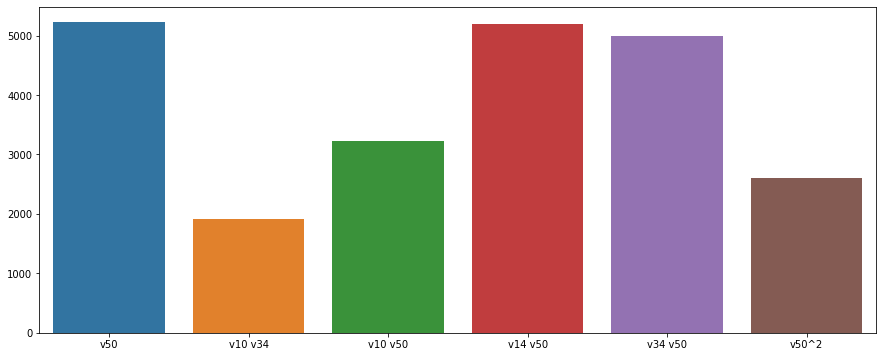

In [13]:
# categorical_input-categorical_output scoring function
score_func = [chi2, mutual_info_classif, f_classif]
# using small value of k=6 for sake of this demonstration
fs = SelectKBest(score_func=score_func[2], k=6)

fs.fit(poly_features_con, y_train)
up_con_cols_2 = list(fs.get_feature_names_out())

fig = plt.figure(figsize=(15,6))
sns.barplot(x=fs.get_feature_names_out(), y=fs.scores_[fs.get_support()])

print("K best continuous features:\n {}".format(up_con_cols_2))

#### Setup processed train and test dataset

In [14]:
train = poly_features_con[up_con_cols_2].join(poly_features_cat[up_cat_cols_2])
test = poly_features_con_test[up_con_cols_2].join(poly_features_cat_test[up_cat_cols_2])

## 6. Model Creation and Hyperparameter tuning <a id=16></a>
[Table of Contents](#18)

We will be using XGBoost model and HyperOpt library for hyperparameter tuning.

To know more about HyperOpt and XGBoost hyperparameter tuning, you can refer this [notebook](https://www.kaggle.com/code/prashant111/a-guide-on-xgboost-hyperparameters-tuning) 

### 6.1 XGBoost model with HyperOpt <a id=17></a>
[Table of Contents](#18)

#### 6.1.1 Require Packages

In [15]:
from xgboost import XGBClassifier
import xgboost as xgb

# import packages for hyperparameters tuning
from hyperopt import STATUS_OK, Trials, fmin, hp, tpe

#### 6.1.2 Creating parameter space for hyperparameter tuning

In [16]:
space={'max_depth': hp.quniform("max_depth", 2, 10, 1),
        'gamma': hp.uniform ('gamma', 1,9),
        'reg_alpha' : hp.quniform('reg_alpha', 40,180,1),
        'reg_lambda' : hp.uniform('reg_lambda', 0,1),
        'colsample_bytree' : hp.uniform('colsample_bytree', 0.3,1),
        'min_child_weight' : hp.quniform('min_child_weight', 0, 10, 1),
        'n_estimators': 300,
        'seed': 0
    }

#### 6.1.3 Objective function to compare different tuning parameters

In [17]:
def objective(space):
    clf=xgb.XGBClassifier(eta=eta,
                    n_estimators =space['n_estimators'], max_depth = int(space['max_depth']), gamma = space['gamma'],
                    reg_alpha = int(space['reg_alpha']),min_child_weight=int(space['min_child_weight']),
                    colsample_bytree=int(space['colsample_bytree']), objective='binary:logistic')
    
    evaluation = [( train, y_train), ( test, y_test)]
    
    clf.fit(train, y_train,
            eval_set=evaluation, 
            early_stopping_rounds=10,verbose=False)
    
    y_pred_prob = clf.predict_proba(test)[:, 1]
    y_pred = clf.predict(test)
    accuracy = accuracy_score(y_test, y_pred)
    log_loss_score = log_loss(y_test, y_pred_prob)
    print("accuracy:{}, log_loss:{}".format(accuracy, log_loss_score))
    
    return {'loss': log_loss_score, 'status': STATUS_OK }

In [18]:
# Set max evaluation count based on your requirement, generally >50 is a good estimate.
best_params = dict()
trials_map = dict()
for eta in [0.01, 0.03, 0.1, 0.3]:
    print("\nTuning with eta={}\n".format(eta))
    trials = Trials()
    best_hyperparams = fmin(fn = objective,
                            space = space,
                            algo = tpe.suggest,
                            max_evals = 2,
                            trials = trials)
    best_params[eta] = best_hyperparams
    trials_map[eta] = trials
    print("best_params for {} are:{}".format(eta, best_params[eta]))


Tuning with eta=0.01

accuracy:0.7642139883139148, log_loss:0.5029255732354851
accuracy:0.762849445435779, log_loss:0.5037898076635946
100%|██████████| 2/2 [00:17<00:00,  8.64s/trial, best loss: 0.5029255732354851]
best_params for 0.01 are:{'colsample_bytree': 0.3107342387545099, 'gamma': 1.0138806019998468, 'max_depth': 5.0, 'min_child_weight': 7.0, 'reg_alpha': 53.0, 'reg_lambda': 0.36224683729259743}

Tuning with eta=0.03

accuracy:0.7662433084916553, log_loss:0.5006122543762915
accuracy:0.7654385780763444, log_loss:0.5016631549627338
100%|██████████| 2/2 [00:07<00:00,  3.89s/trial, best loss: 0.5006122543762915]
best_params for 0.03 are:{'colsample_bytree': 0.880086431605446, 'gamma': 2.7450731859260484, 'max_depth': 6.0, 'min_child_weight': 5.0, 'reg_alpha': 57.0, 'reg_lambda': 0.1758987458649799}

Tuning with eta=0.1

accuracy:0.766348273328435, log_loss:0.5033095130950211
accuracy:0.7659284139813163, log_loss:0.5035333472371596
100%|██████████| 2/2 [00:03<00:00,  1.68s/trial, b

Choose best_params that gives minimum loss and then use those params for final model creation.

#### 6.1.4 Final tuned model (with best_params)

In [19]:
# Training model with best_params identified with HyperOpt parameter tuning.
model = XGBClassifier(subsample= 1.0,
                        min_child_weight= 5,
                        max_depth= 4,
                        gamma=2,
                        eta=0.1,
                        colsample_bytree=0.8,
                        n_estimators=300, 
                        objective='binary:logistic', 
                        nthread=1, 
                        verbosity=1)

model.fit(train, y_train, verbose=True)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=0.8,
              early_stopping_rounds=None, enable_categorical=False, eta=0.1,
              eval_metric=None, gamma=2, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.100000001, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=4, max_leaves=0, min_child_weight=5,
              missing=nan, monotone_constraints='()', n_estimators=300,
              n_jobs=1, nthread=1, num_parallel_tree=1, predictor='auto',
              random_state=0, ...)

### If you like the notebook, consider giving an upvote.
[Table of Contents](#18)

**Check my other notebooks**

1. https://www.kaggle.com/code/crashoverdrive/data-science-salary-complete-eda
2. https://www.kaggle.com/code/crashoverdrive/studentsperformance-data-visualization-beginners
3. https://www.kaggle.com/code/crashoverdrive/heart-attack-analysis-prediction-90-accuracy
4. https://www.kaggle.com/code/crashoverdrive/song-popularity-prediction-visualizations